In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.dirname(os.getcwd()))
from src.utils.mining_data_tb import *
from src.utils.vizualitation_tb import *

/home/jose/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('../data/phl_exoplanet_catalog.csv')

In [3]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [5]:
columnas_escogidas = ['P_NAME', 'P_STATUS', 'P_MASS', 'P_RADIUS', 'P_PERIOD', 'P_ECCENTRICITY', 'P_FLUX', 'P_ESI', 'P_GRAVITY', 'P_DENSITY', 'S_DISTANCE', 'S_MASS', 'S_RADIUS_EST', 'S_LUMINOSITY', 'S_CONSTELLATION', 'S_RA_T', 'S_DEC_T', 'P_HABZONE_CON', 'P_STATUS']

In [6]:
df = df[(df.P_STATUS == 3) & (df.P_DETECTION == 'Transit')]

In [7]:
df = df[columnas_escogidas]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3114 entries, 48 to 4044
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_NAME           3114 non-null   object 
 1   P_STATUS         3114 non-null   float64
 2   P_MASS           677 non-null    float64
 3   P_RADIUS         3100 non-null   float64
 4   P_PERIOD         3113 non-null   float64
 5   P_ECCENTRICITY   599 non-null    float64
 6   P_FLUX           2994 non-null   float64
 7   P_ESI            2994 non-null   float64
 8   P_GRAVITY        668 non-null    float64
 9   P_DENSITY        668 non-null    float64
 10  S_DISTANCE       3113 non-null   float64
 11  S_MASS           2367 non-null   float64
 12  S_RADIUS_EST     3090 non-null   float64
 13  S_LUMINOSITY     3057 non-null   float64
 14  S_CONSTELLATION  3114 non-null   object 
 15  S_RA_T           3114 non-null   object 
 16  S_DEC_T          3114 non-null   object 
 17  P_HABZONE_CON

In [8]:
eliminar_columnas_nan(df, 0.7) # Porcentaje del 70%

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [9]:
#eliminar_filas
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 48 to 4030
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_NAME           469 non-null    object 
 1   P_STATUS         469 non-null    float64
 2   P_MASS           469 non-null    float64
 3   P_RADIUS         469 non-null    float64
 4   P_PERIOD         469 non-null    float64
 5   P_ECCENTRICITY   469 non-null    float64
 6   P_FLUX           469 non-null    float64
 7   P_ESI            469 non-null    float64
 8   P_GRAVITY        469 non-null    float64
 9   P_DENSITY        469 non-null    float64
 10  S_DISTANCE       469 non-null    float64
 11  S_MASS           469 non-null    float64
 12  S_RADIUS_EST     469 non-null    float64
 13  S_LUMINOSITY     469 non-null    float64
 14  S_CONSTELLATION  469 non-null    object 
 15  S_RA_T           469 non-null    object 
 16  S_DEC_T          469 non-null    object 
 17  P_HABZONE_CON 

In [11]:
def convertir_a_grados_decimales(datos: str):
    grados_decimales = 0
    grados_horas_minutos = datos.split(' ')
    grados_decimales += int(grados_horas_minutos[0])
    grados_decimales += int(grados_horas_minutos[1])/60
    grados_decimales += float(grados_horas_minutos[2])/3600
    return grados_decimales

df.S_RA_T = df.S_RA_T.apply(convertir_a_grados_decimales)
df.S_DEC_T = df.S_DEC_T.apply(convertir_a_grados_decimales)
df = df[(df.S_RA_T < 305) & (df.S_RA_T > 275) & (df.S_DEC_T < 54) & (df.S_DEC_T > 36)]

<AxesSubplot:>

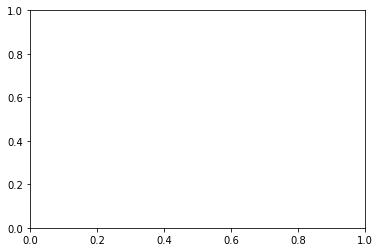

In [12]:
sns.scatterplot(data=df, x='S_RA_T', y='S_DEC_T', hue='P_HABZONE_CON')

In [13]:
sns.countplot(data=df, x='P_HABZONE_CON')

ValueError: min() arg is an empty sequence